# Лабораторная работа №3.2.1

Процент потерянных данных: 79.46%
Точность модели: 0.6909
Точность без признака Embarked: 0.6909
Разница в точности: 0.0000


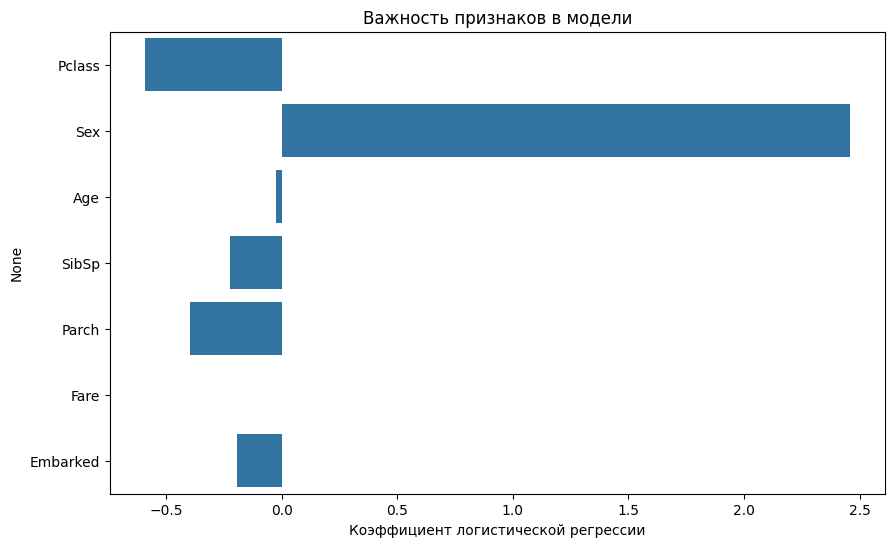

In [20]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

titanic = pd.read_csv('Titanic.csv')

# Удаление строк с пропусками
titanic_clean = titanic.dropna()

# Удаление нечисловых столбцов (кроме Sex и Embarked)
cols_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
titanic_clean = titanic_clean.drop(cols_to_drop, axis=1)

# Перекодировка категориальных признаков
titanic_clean['Sex'] = titanic_clean['Sex'].map({'male': 0, 'female': 1})
titanic_clean['Embarked'] = titanic_clean['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

# Вычисление процента потерянных данных
initial_rows = len(titanic)
final_rows = len(titanic_clean)
lost_percentage = (initial_rows - final_rows) / initial_rows * 100
print(f"Процент потерянных данных: {lost_percentage:.2f}%")

# Разделение на признаки и целевую переменную
X = titanic_clean.drop('Survived', axis=1)
y = titanic_clean['Survived']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Оценка точности
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.4f}")

# Модель без Embarked
X_no_emb = X.drop('Embarked', axis=1)
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_emb, y, test_size=0.3, random_state=42)

model_no_emb = LogisticRegression(max_iter=1000)
model_no_emb.fit(X_train_no, y_train_no)
y_pred_no = model_no_emb.predict(X_test_no)
accuracy_no_emb = accuracy_score(y_test_no, y_pred_no)
print(f"Точность без признака Embarked: {accuracy_no_emb:.4f}")
print(f"Разница в точности: {accuracy - accuracy_no_emb:.4f}")

# Визуализация важности признаков
features = X.columns
importances = model.coef_[0]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Важность признаков в модели')
plt.xlabel('Коэффициент логистической регрессии')
plt.show()